In [134]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [135]:
plt.style.use('ggplot')

In [136]:
#rename the .csv files accordingly for 2023 and 2024 data.
df = pd.read_csv('survey_results_public_2024.csv' , index_col='ResponseId')


pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 85)
#cleaning features that won't be necessary for our processing
drop_features = ["Check","NEWSOSites","SOVisitFreq","SOAccount","SOPartFreq","SOHow","SOComm",
                 "Knowledge_1","Knowledge_2","Knowledge_3","Knowledge_4","Knowledge_5","Knowledge_6",
                 "Knowledge_7","Knowledge_8","Knowledge_9","Frequency_1","Frequency_2","Frequency_3",
                 "SurveyLength","SurveyEase",
                 "JobSatPoints_1","JobSatPoints_4","JobSatPoints_5","JobSatPoints_6","JobSatPoints_7",
                 "JobSatPoints_8","JobSatPoints_9","JobSatPoints_10","JobSatPoints_11",
                 "LearnCodeOnline","TechDoc",
                 "PurchaseInfluence","BuyNewTool","BuildvsBuy","TechEndorse", "Currency",
                 "LanguageAdmired", "PlatformAdmired" ,"DatabaseAdmired", "WebframeAdmired", "EmbeddedAdmired",
                 "MiscTechHaveWorkedWith","MiscTechWantToWorkWith","MiscTechAdmired", 
                 "ToolsTechHaveWorkedWith","ToolsTechWantToWorkWith","ToolsTechAdmired","NEWCollabToolsHaveWorkedWith",
                 "NEWCollabToolsWantToWorkWith","NEWCollabToolsAdmired",
                 "LanguageWantToWorkWith","DatabaseWantToWorkWith","PlatformWantToWorkWith",
                 "WebframeWantToWorkWith", "EmbeddedWantToWorkWith",
                 "OfficeStackAsyncHaveWorkedWith","OfficeStackAsyncWantToWorkWith","OfficeStackAsyncAdmired",
                 "OfficeStackSyncHaveWorkedWith","OfficeStackSyncWantToWorkWith","OfficeStackSyncAdmired",
                 "AISearchDevWantToWorkWith","AISearchDevAdmired", "AISent","AIComplex",
                 "AIToolInterested in Using","AIToolNot interested in Using",
                 "AINextMuch more integrated","AINextNo change",
                 "AINextMore integrated","AINextLess integrated","AINextMuch less integrated",
                 "ProfessionalQuestion","ConvertedCompYearly","ProfessionalTech","ProfessionalCloud",
                 "TimeSearching","TimeAnswering","TBranch"]
#AINextMuch more integrated	,
# AINextNo change	,
# AINextMore integrated	,
# AINextLess integrated	,
# AINextMuch less integrated They need to be rated together
df = df.drop(drop_features, axis=1) 


In [145]:
country_grp = df.groupby(['Country'])
America = country_grp.get_group('United States of America').copy()
America = America.drop('Country', axis=1)
America

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/590753456.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  America = country_grp.get_group('United States of America').copy()


,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,EmbeddedHaveWorkedWith,OpSysPersonal use,OpSysProfessional use,AISearchDevHaveWorkedWith,AISelect,AIBen,AIAcc,AIToolCurrently Using,AIThreat,AIEthics,AIChallenges,ICorPM,WorkExp,Frustration,Industry,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",10,NaN,Student,NaN,NaN,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...,Cloud Firestore,Cloudflare,Node.js,Rasberry Pi,iOS;MacOS;Ubuntu,NaN,ChatGPT;GitHub Copilot;OpenAI Codex,Yes,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Writing code;Debugging and getting help,No,Circulating misinformation or disinformation;M...,NaN,NaN,NaN,NaN,NaN,NaN
7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",7,7,Academic researcher,NaN,NaN,R,NaN,NaN,NaN,NaN,MacOS,MacOS,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,20,NaN,Project manager,NaN,NaN,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Node.js;React;Ruby on Rails,NaN,Windows;Windows Subsystem for Linux (WSL),Windows,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,Yes,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Learning about a codebase;Writing code;Documen...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Individual contributor,15.0,Amount of technical debt;Number of software to...,Healthcare,8.0
13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,20,12,"Developer, back-end",NaN,NaN,Bash/Shell (all shells);C#;JavaScript;PowerShe...,MySQL,Amazon Web Services (AWS);Google Cloud;Hetzner...,NaN,NaN,Windows;Windows Subsystem for Linux (WSL),Windows Subsystem for Linux (WSL),NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,Individual contributor,12.0,Amount of technical debt;Complexity of tech st...,Software Development,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65257,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Bootstrapping a business;Professional developm...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,30,7,Other (please specify):,2 to 9 employees,NaN,C;C++;Python;Swift;TypeScript,InfluxDB;MariaDB;MongoDB;MySQL;SQLite,Amazon Web Services (AWS),Angular;Express;Flask,LLVM's Clang,MacOS;Ubuntu,MacOS;Ubuntu,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;P...,Yes,Increase productivity;Speed up learning,Somewhat distrust,Writing code;Search for answers,No,Missing or incorrect attribution for sources o...,Don’t trust the output or answers,NaN,NaN,NaN,NaN,NaN
65262,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hob

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2924241722.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


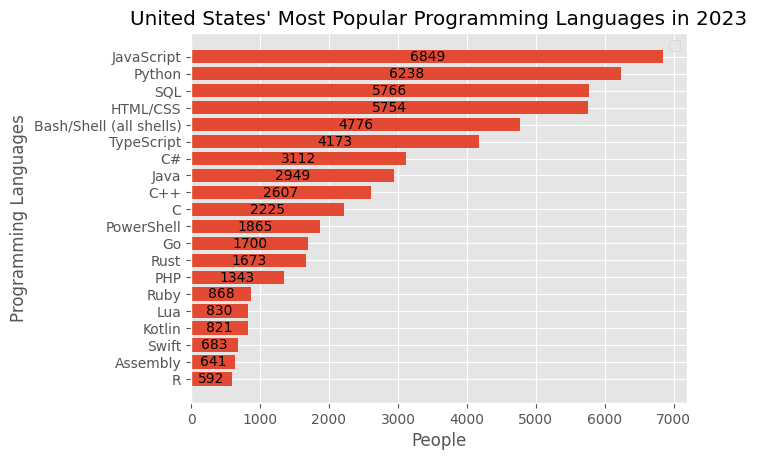

In [138]:
Languages = America['LanguageHaveWorkedWith'].fillna('')
lang_count = Counter()
for i in Languages:
    lang_count.update(i.split(';'))
prog_lang =[]
people_count=[]
for data in lang_count.most_common(20):
    prog_lang.append(data[0])
    people_count.append(data[1])
fig, pop_lang = plt.subplots()
reverse_prog = list(reversed(prog_lang))
reverse_people_count = list(reversed(people_count))
pop_lang.set_title('United States\' Most Popular Programming Languages in 2023')
bar = pop_lang.barh(reverse_prog, reverse_people_count)
pop_lang.bar_label(bar, label_type='center')
pop_lang.set_xlabel('People')
pop_lang.set_ylabel('Programming Languages')
plt.legend()
plt.show()
    

In [139]:
filt_under_18 = ((America['Age'] == 'Under 18 years old') & (America['CompTotal'] > 1000))
filt_18_24 = ((America['Age'] == '18-24 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_25_34 = ((America['Age'] == '25-34 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_35_44 = ((America['Age'] == '35-44 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))
filt_55_64 = ((America['Age'] == '55-64 years old') & ((America['CompTotal'] > 1000) & (America['CompTotal'] < 1_000_000)))


In [140]:
def graph_by_age(filt, title):
    fig, graph =plt.subplots()
    y_value = America.loc[filt,'CompTotal'].agg(['max','min','median','mean','std'],numeric_only=True)
    x_value = ['max','min','median','mean','std']
    bar = graph.bar(x_value,y_value)
    graph.set_title(title)
    graph.bar_label(bar, fmt='${:,.2f}')
    graph.set_xlabel('Basic Information')
    graph.set_ylabel('Salary')
    plt.legend()
    plt.show()  

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2172270925.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


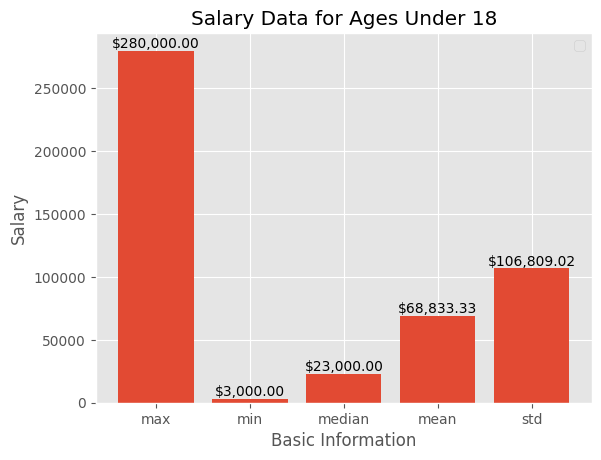

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2172270925.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


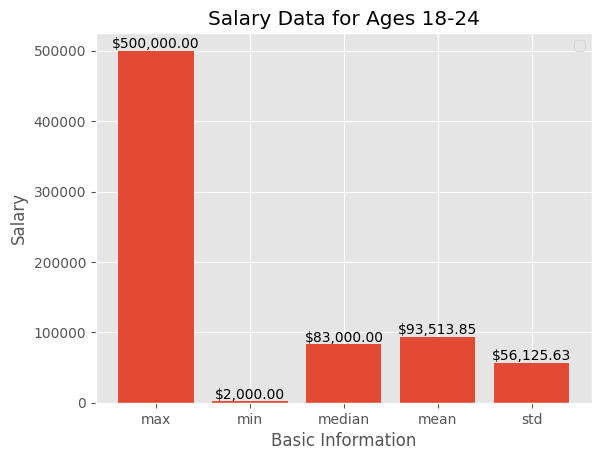

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2172270925.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


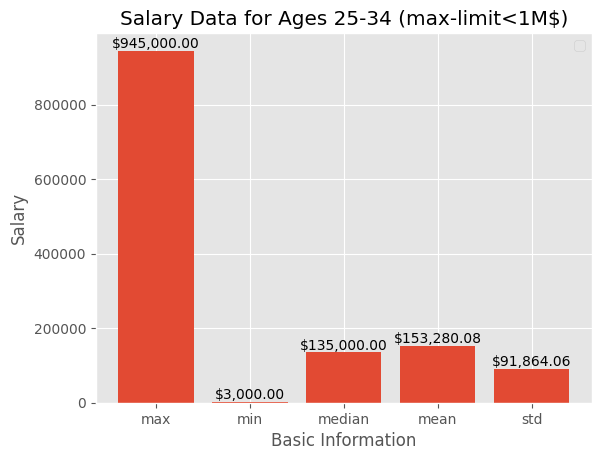

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2172270925.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


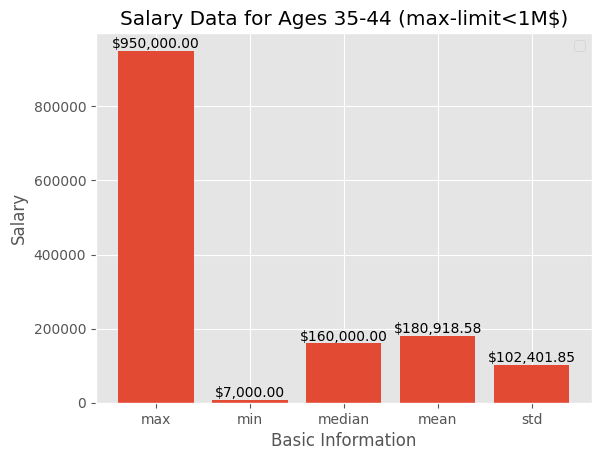

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/2172270925.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


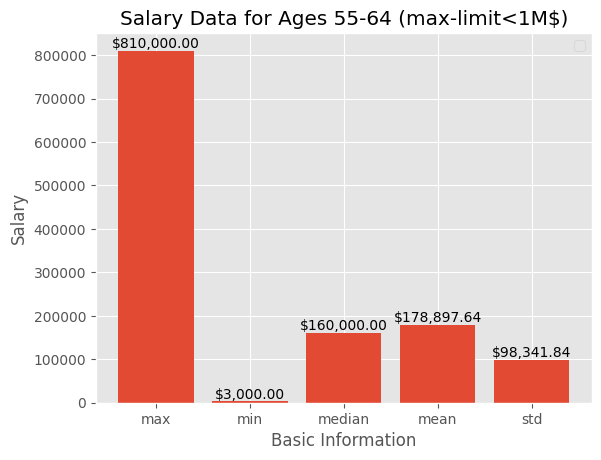

In [141]:
graph_by_age(filt_under_18, 'Salary Data for Ages Under 18')
graph_by_age(filt_18_24, 'Salary Data for Ages 18-24')
graph_by_age(filt_25_34, 'Salary Data for Ages 25-34 (max-limit<1M$)')
graph_by_age(filt_35_44, 'Salary Data for Ages 35-44 (max-limit<1M$)')
graph_by_age(filt_55_64, 'Salary Data for Ages 55-64 (max-limit<1M$)')

/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/3033489863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  America['DevType'].replace(['nan', 'Developer Experience','Other (please specify):'],np.nan,inplace=True)
/var/folders/yy/736wzgqn4dbf87vndn5ny1pm0000gn/T/ipykernel_85221/3033489863.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

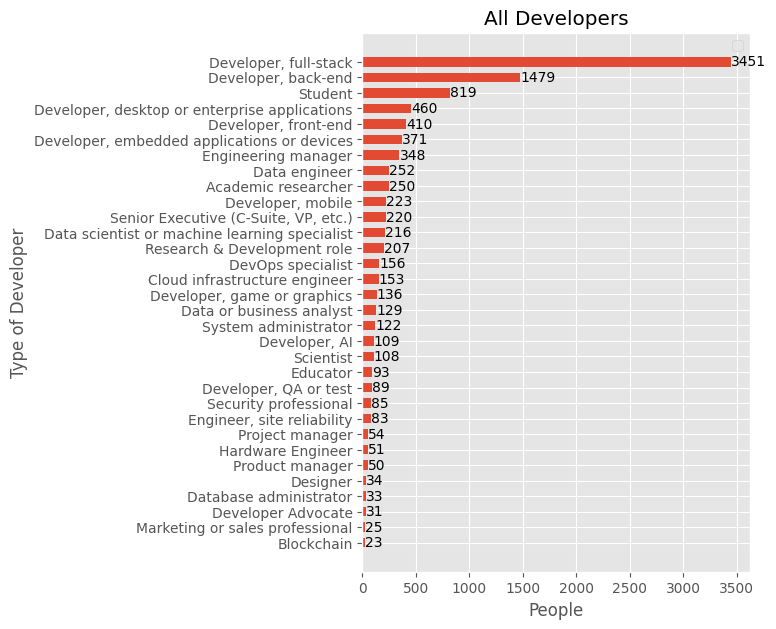

In [142]:
fig, devtype_graph =plt.subplots(figsize=(5,7))
America['DevType'].replace(['nan', 'Developer Experience','Other (please specify):'],np.nan,inplace=True)
df_devtype = America['DevType'].dropna().value_counts()
y_value_dev = list(reversed(df_devtype.index))
x_value_dev= list(reversed(df_devtype))
bar = devtype_graph.barh(y_value_dev,x_value_dev, height=0.6)
devtype_graph.set_title('All Developers')
devtype_graph.bar_label(bar)
devtype_graph.set_xlabel('People')
devtype_graph.set_ylabel('Type of Developer')
plt.legend()
plt.show()  

In [143]:

Devs = America.groupby('DevType')

In [144]:
Data_science = pd.concat([Devs.get_group('Data or business analyst'),
                          Devs.get_group('Engineer, data'), 
                          Devs.get_group('Data scientist or machine learning specialist')])

KeyError: 'Engineer, data'

In [ ]:
Software_engr = pd.concat([Devs.get_group('Developer, back-end'),
                          Devs.get_group('Developer, front-end'), 
                          Devs.get_group('Developer, full-stack'),
                          Devs.get_group('Developer, desktop or enterprise applications'),
                          Devs.get_group('Developer, QA or test'),
                          Devs.get_group('Developer, mobile'),
                          Devs.get_group('Developer, game or graphics'),
                          Devs.get_group('DevOps specialist')] )

In [ ]:
Management = pd.concat([Devs.get_group('Senior Executive (C-Suite, VP, etc.)'),
                        Devs.get_group('Engineering manager'),
                        Devs.get_group('Project manager'),
                        Devs.get_group('Product manager'),
                        Devs.get_group('Research & Development role')])

In [ ]:
Information_Technology = pd.concat([Devs.get_group('System administrator'),
                                    Devs.get_group('Database administrator'),
                                    Devs.get_group('Cloud infrastructure engineer'),
                                    Devs.get_group('Security professional'),
                                    Devs.get_group('Engineer, site reliability'),])

In [ ]:
Electrical_engr = pd.concat([Devs.get_group('Hardware Engineer'),
                             Devs.get_group('Developer, embedded applications or devices')])

In [ ]:
Academic = pd.concat([Devs.get_group('Academic researcher'),
                      Devs.get_group('Student'),
                      Devs.get_group('Educator'),
                      Devs.get_group('Scientist'),]) 

In [ ]:
filt_data_science = ((Data_science['CompTotal'] > 1000) & (Data_science['CompTotal'] <1_000_000))
filt_software_engr = ((Software_engr['CompTotal'] > 1000) & (Software_engr['CompTotal'] < 1_000_000))
filt_management = ((Management['CompTotal'] > 1000) & (Management['CompTotal'] < 5_000_000))
filt_IT = ((Information_Technology['CompTotal'] > 1000) & (Information_Technology['CompTotal'] < 1_000_000))
filt_electrical = ((Electrical_engr['CompTotal'] > 1000) & (Electrical_engr['CompTotal'] < 1_000_000))
filt_Academic = ((Academic['CompTotal'] > 1000) & (Academic['CompTotal'] < 1_000_000))

In [ ]:
def graph_by_career(group,filt, title):
    fig, graph =plt.subplots()
    y_value = group.loc[filt,'CompTotal'].agg(['max','min','median','mean','std'],numeric_only=True)
    x_value = ['max','min','median','mean','std']
    bar = graph.bar(x_value,y_value)
    graph.set_title(title)
    graph.bar_label(bar, fmt='${:,.2f}')
    graph.set_xlabel('Basic Information')
    graph.set_ylabel('Salary')
    plt.legend()
    plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


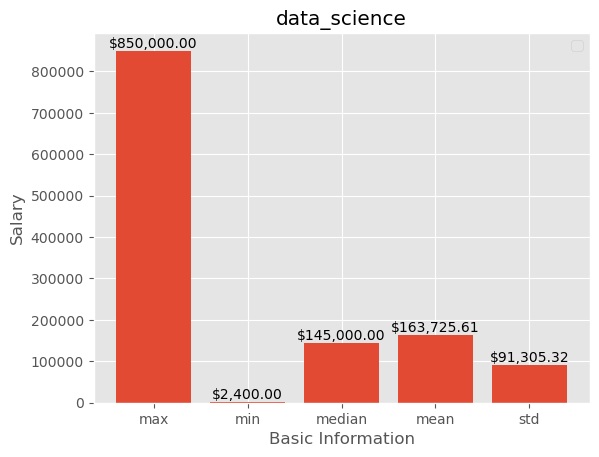

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


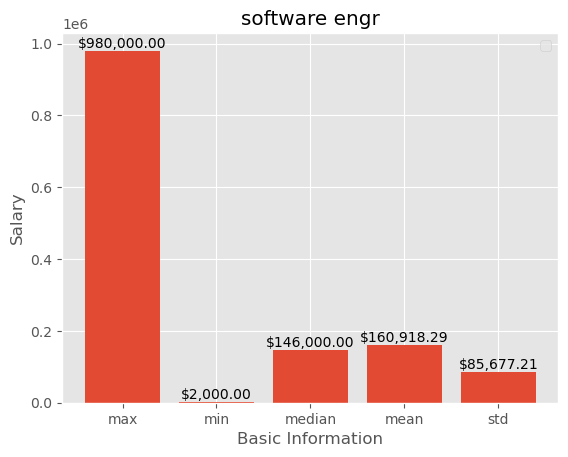

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


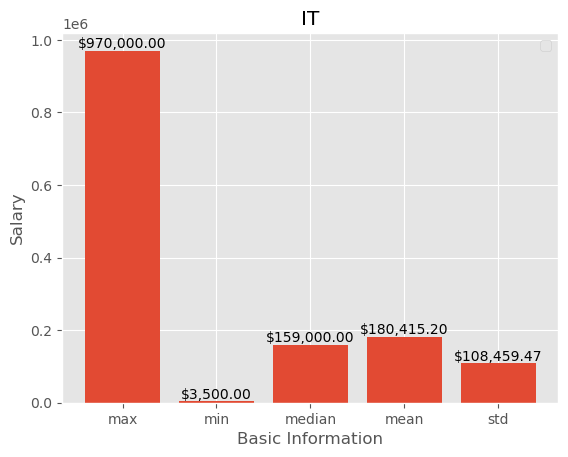

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


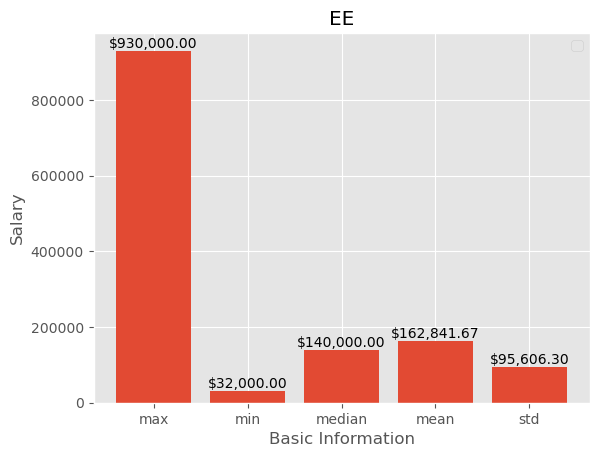

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


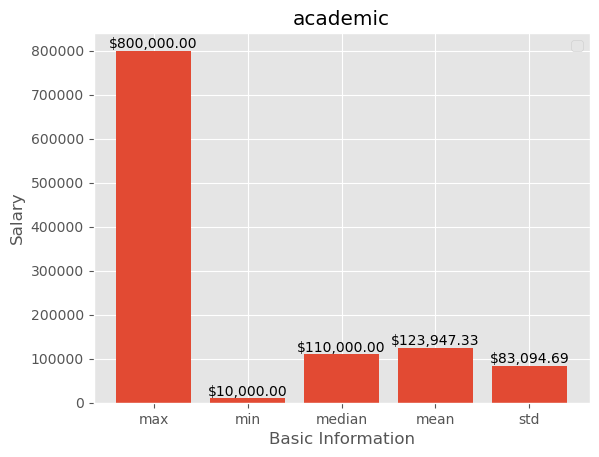

In [ ]:
graph_by_career(Data_science ,filt_data_science, 'data_science')
graph_by_career(Software_engr ,filt_software_engr, 'software engr')
graph_by_career(Information_Technology ,filt_IT, 'IT')
graph_by_career(Electrical_engr ,filt_electrical, 'EE')
graph_by_career(Academic ,filt_Academic, 'academic')

In [ ]:
def lang_careers(group,careerName):
    Languages = group['LanguageHaveWorkedWith'].fillna('')
    lang_count = Counter()
    for i in Languages:
        lang_count.update(i.split(';'))
    prog_lang =[]
    people_count=[]
    for data in lang_count.most_common(20):
        prog_lang.append(data[0])
        people_count.append(data[1])
    fig, pop_lang = plt.subplots()
    reverse_prog = list(reversed(prog_lang))
    reverse_people_count = list(reversed(people_count))
    job_name = ('Most common Languages in ' + careerName)
    pop_lang.set_title(job_name)
    bar = pop_lang.barh(reverse_prog, reverse_people_count)
    pop_lang.bar_label(bar, label_type='center')
    pop_lang.set_xlabel('People')
    pop_lang.set_ylabel('Programming Languages')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


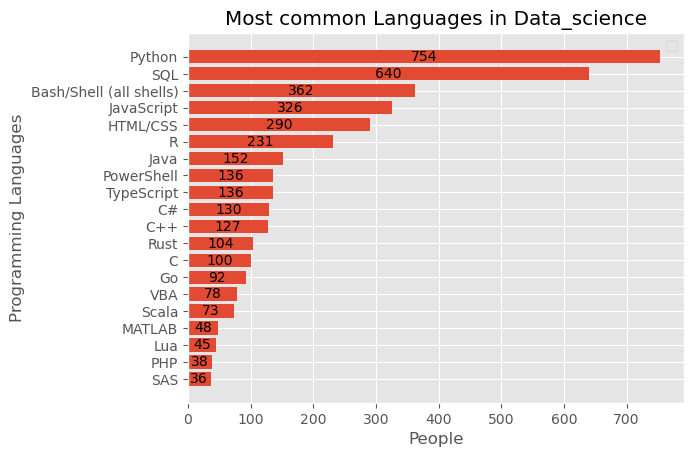

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


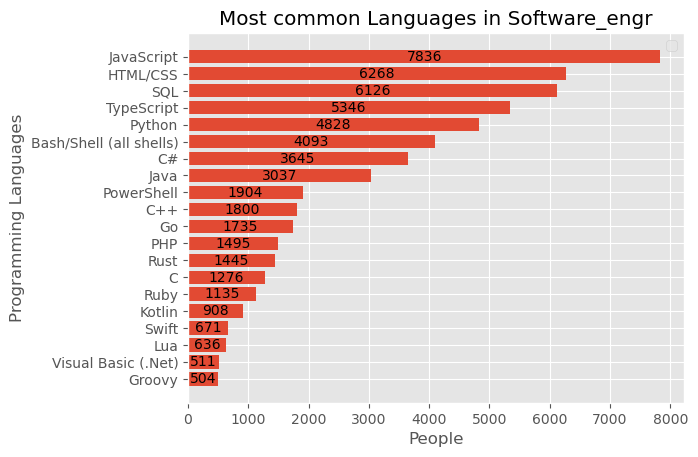

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


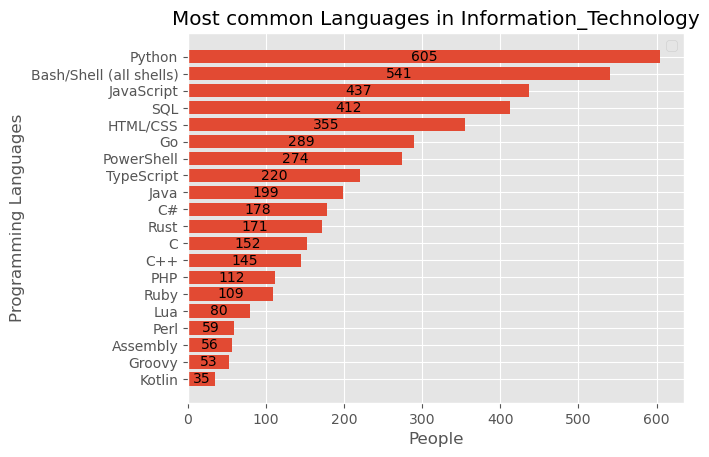

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


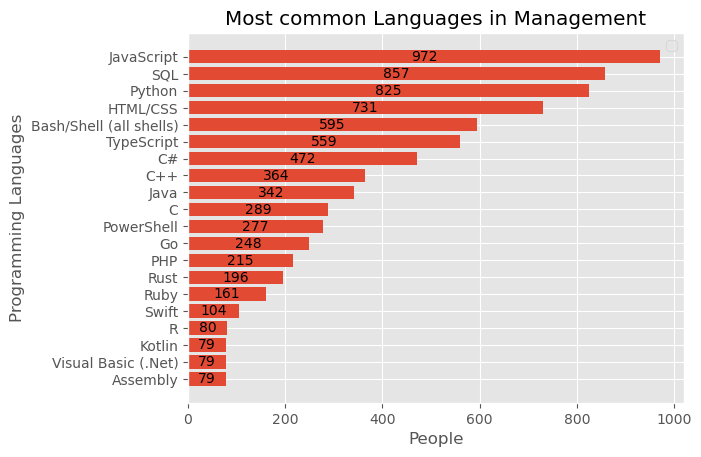

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


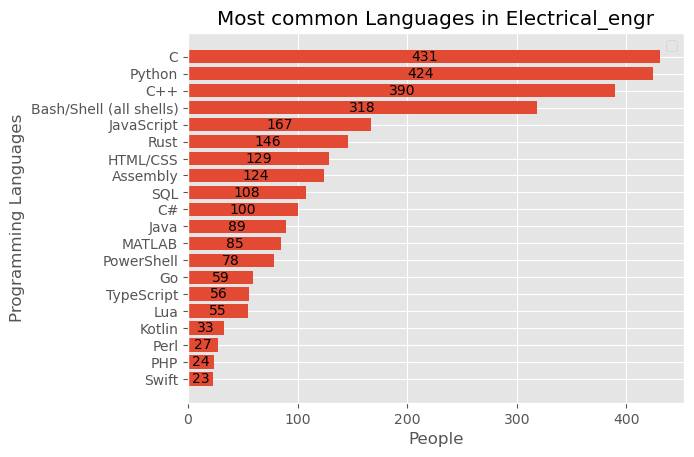

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


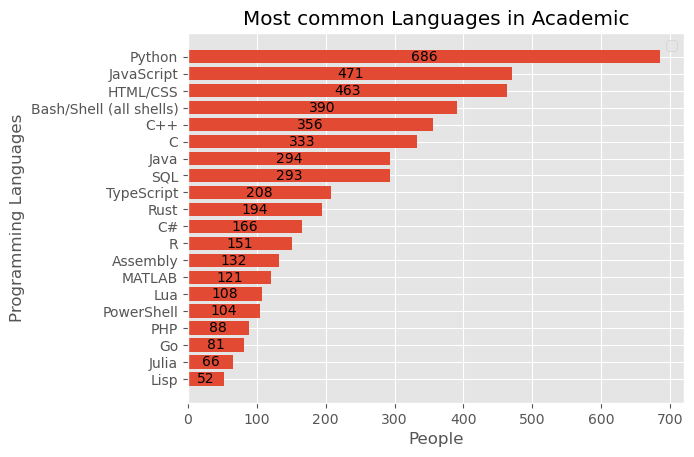

In [ ]:
lang_careers(Data_science,'Data_science')
lang_careers(Software_engr,'Software_engr')
lang_careers(Information_Technology,'Information_Technology')
lang_careers(Management,'Management')
lang_careers(Electrical_engr,'Electrical_engr')
lang_careers(Academic,'Academic')


In [ ]:
def job_pie(group, name):
    fig, career_pie = plt.subplots(figsize=(10,10))
    job = group['DevType'].value_counts()
    count_ppl = group['DevType'].count()
    career_pie.pie(job, labels= job.index, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%.2f%%' , textprops= {'fontsize' : 10})
    career_pie.set_title(f'Relational population, total= {count_ppl} people')
    career_pie.set_xlabel(name)
    

In [ ]:
Data_science['DevType'].count()

900

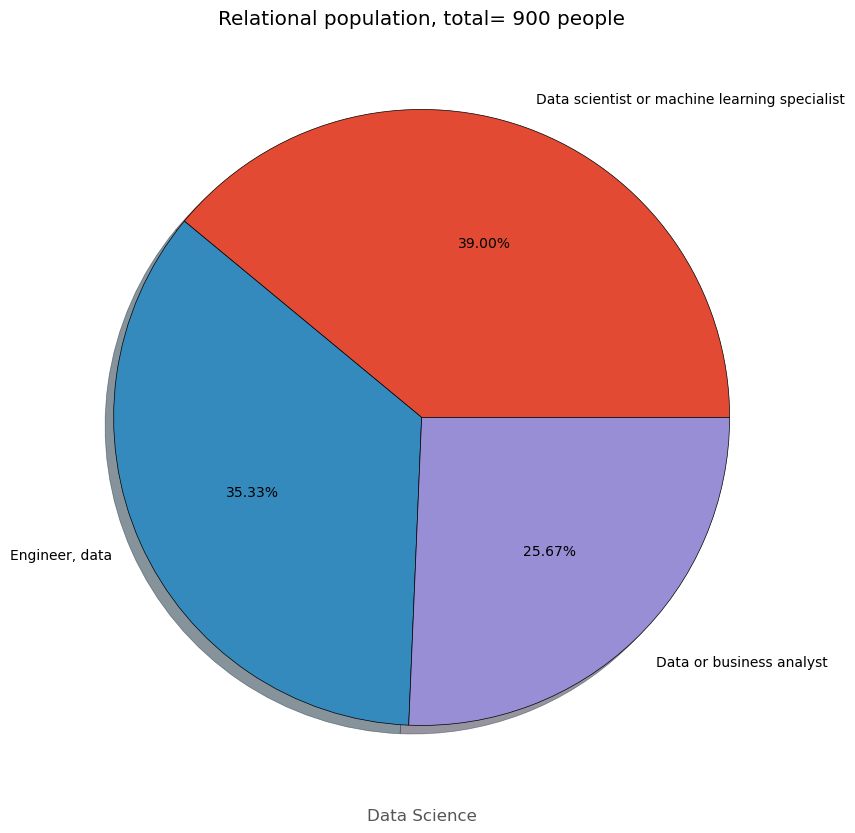

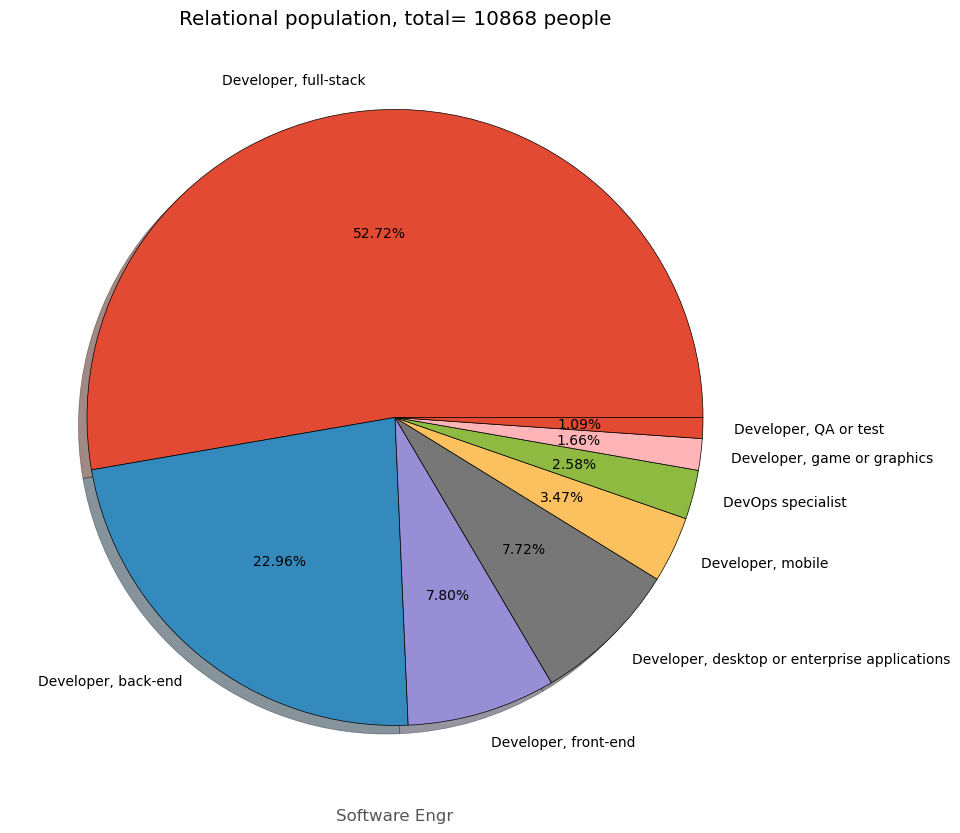

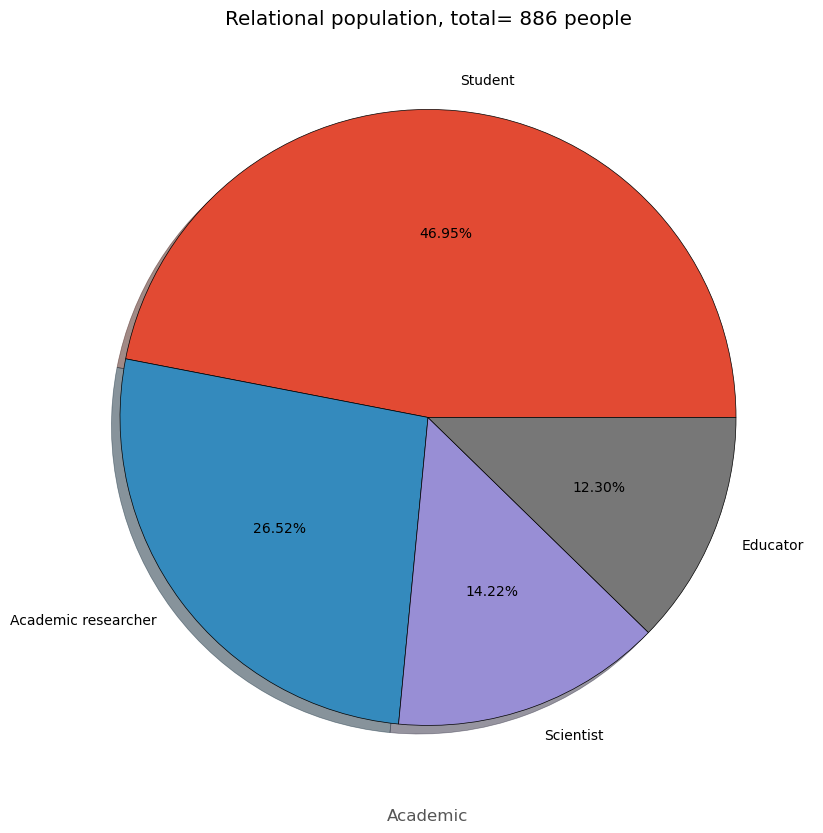

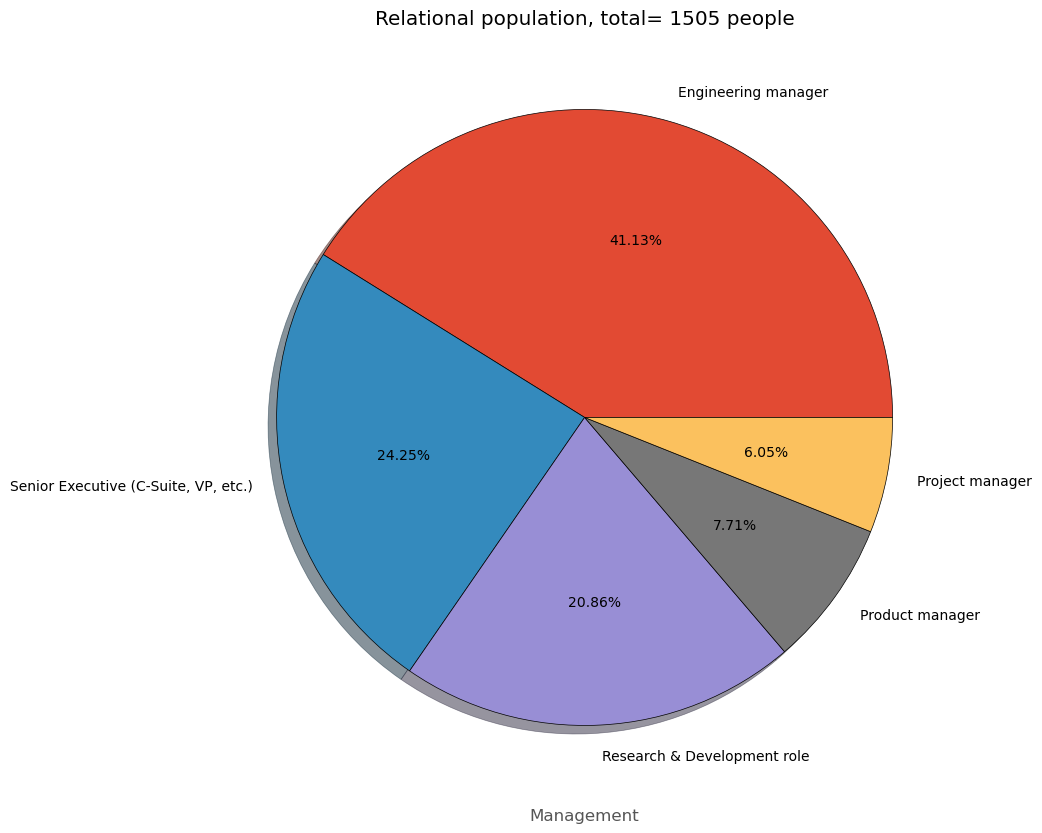

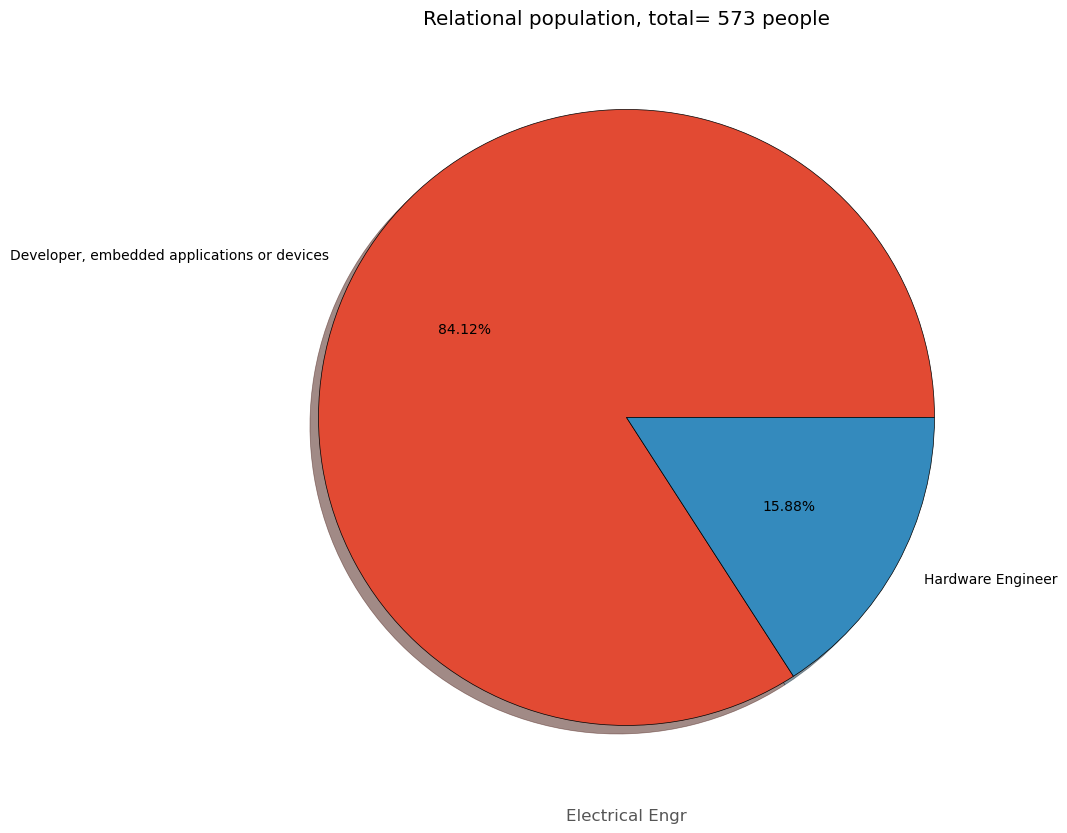

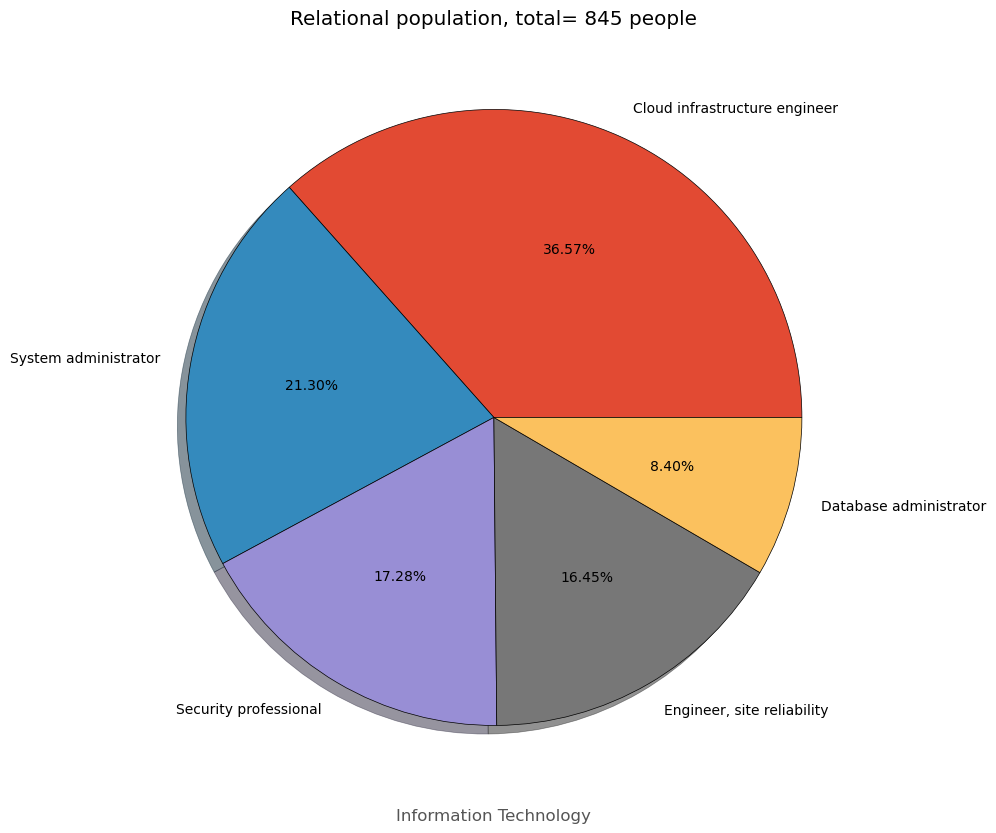

In [ ]:
job_pie(Data_science, 'Data Science')
job_pie(Software_engr, 'Software Engr')
job_pie(Academic, 'Academic')
job_pie(Management, 'Management')
job_pie(Electrical_engr, 'Electrical Engr')
job_pie(Information_Technology, 'Information Technology')

In [ ]:
# !jupyter nbconvert <notebook name>.ipynb --to html // converting to html

In [ ]:
America

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,N